In [ ]:
from google.colab import files
uploaded = files.upload()

Saving log-APE2-ONLINE-CYCLE9-B-17-2023-06-16-05-00-00_2023-09-08T16_13_06.623_2023-09-08T16_20_10.336.xml to log-APE2-ONLINE-CYCLE9-B-17-2023-06-16-05-00-00_2023-09-08T16_13_06.623_2023-09-08T16_20_10.336.xml


### **ALGORITMO DE EXTRACCIÓN DE LOGS EN XML ALMA**

In [ ]:
import re
import pandas as pd

# Inicializamos una lista para almacenar todas las filas de datos.
data = []

# Abre y lee el archivo XML línea por línea
with open('/content/log-APE2-ONLINE-CYCLE9-B-17-2023-06-16-05-00-00_2023-09-08T16_13_06.623_2023-09-08T16_20_10.336.xml', 'r') as f:
    for linea in f:
        # Extraer el contenido de CDATA
        cdata_content = re.findall(r'<!\[CDATA\[(.*?)\]\]>', linea, re.DOTALL)
        cdata = cdata_content[0] if cdata_content else ""

        # Extraer los atributos y el tipo de log
        match = re.match(r'<(?P<Tipo>\w+)(?P<Atributos>.*?)>', linea)
        if match:
            tipo = match.group('Tipo')
            atributos = match.group('Atributos')

            # Extraer los valores de los atributos
            timestamp = re.search(r'TimeStamp="([^"]*)"', atributos)
            file = re.search(r'File="([^"]*)"', atributos)
            line = re.search(r'Line="([^"]*)"', atributos)
            routine = re.search(r'Routine="([^"]*)"', atributos)
            host = re.search(r'Host="([^"]*)"', atributos)
            process = re.search(r'Process="([^"]*)"', atributos)
            source_object = re.search(r'SourceObject="([^"]*)"', atributos)
            thread = re.search(r'Thread="([^"]*)"', atributos)
            log_id = re.search(r'LogId="([^"]*)"', atributos)

            fila = {
                "Tipo": tipo,
                "TimeStamp": timestamp.group(1) if timestamp else "",
                "File": file.group(1) if file else "",
                "Line": line.group(1) if line else "",
                "Routine": routine.group(1) if routine else "",
                "Host": host.group(1) if host else "",
                "Process": process.group(1) if process else "",
                "SourceObject": source_object.group(1) if source_object else "",
                "Thread": thread.group(1) if thread else "",
                "LogId": log_id.group(1) if log_id else "",
                "CDATA": cdata
            }

            data.append(fila)

# Definir las columnas del DataFrame
columnas = ["Tipo", "TimeStamp", "File", "Line", "Routine", "Host", "Process", "SourceObject", "Thread", "LogId", "CDATA"]

# Crear el DataFrame
df = pd.DataFrame(data, columns=columnas)

# Mostrar las primeras filas del DataFrame
df.head(10)


,Tipo,TimeStamp,File,Line,Routine,Host,Process,SourceObject,Thread,LogId,CDATA
0,Info,2023-09-08T16:13:06.461,ambServer.c,1150,loggingThread,lo-lmc-2,CONTROL/LMC2/cppContainer,ambServer,,,Channel 5 has seen 0 total control messages an...
1,Info,2023-09-08T16:13:06.528,ambServer.c,1131,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,ISR: 362210257/573113038991755 Unexp Int: 9132...
2,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 1 has seen 0 total control messages an...
3,Debug,2023-09-08T16:13:06.593,loggingLogger.cpp,150,virtual Logging::Logger::~Logger(),lo-lmc-2,CONTROL/LMC2/cppContainer,ambServer,,,Logging Statistics for: Undefined.ambServer
4,Debug,2023-09-08T16:13:06.593,loggingLogger.cpp,150,virtual Logging::Logger::~Logger(),cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Logging Statistics for: Undefined.ambServer
5,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 2 has seen 0 total control messages an...
6,Debug,2023-09-08T16:13:06.594,loggingLogger.cpp,150,virtual Logging::Logger::~Logger(),cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Logging Statistics for: Undefined.ambServer
7,Debug,2023-09-08T16:13:06.595,loggingLogger.cpp,150,virtual Logging::Logger::~Logger(),dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,Logging Statistics for: Undefined.ambServer
8,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 3 has seen 0 total control messages an...
9,Info,2023-09-08T16:13:06.528,ambServer.c,1142,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,Chan 0 has seen 2 late control messages out of...


### **FRECUENCIA DE PALABRAS EN LOGS**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


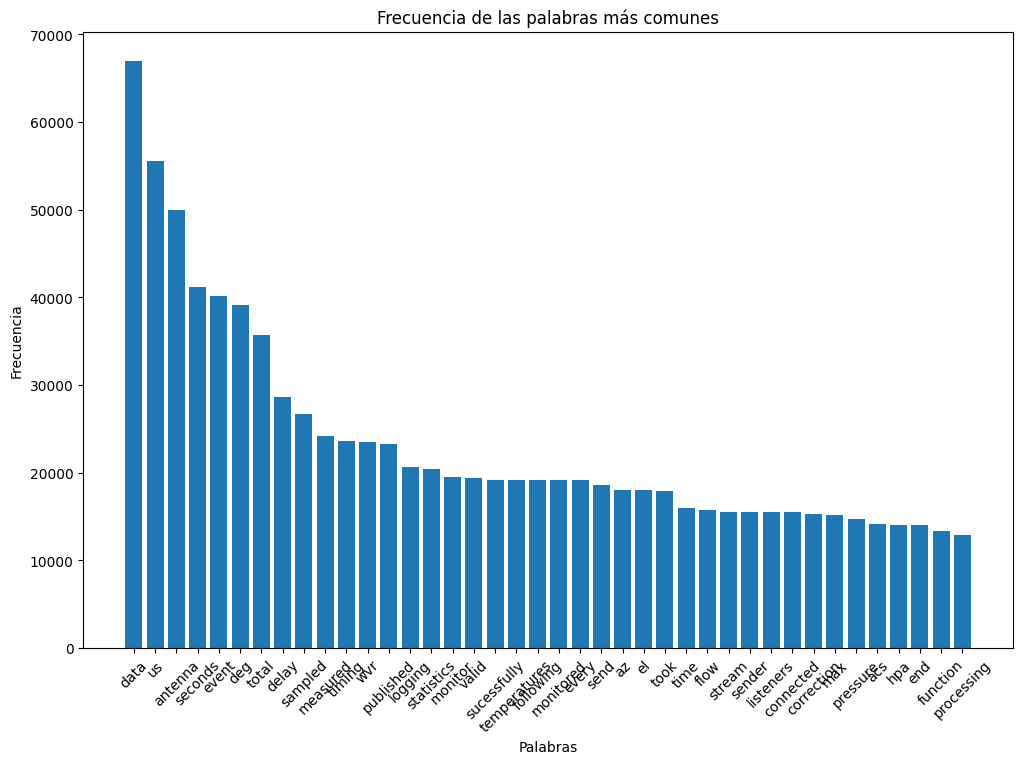

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Función para limpiar el texto
def limpiar_texto(texto):
    # Tokenizar el texto
    palabras = word_tokenize(texto)
    # Convertir a minúsculas
    palabras = [palabra.lower() for palabra in palabras]
    # Eliminar stopwords y palabras no alfabéticas
    palabras_limpias = [palabra for palabra in palabras if palabra.isalpha() and palabra not in stopwords.words('english')]
    return palabras_limpias

# Aplicar la limpieza de texto a la columna CDATA
df['PalabrasLimpias'] = df['CDATA'].apply(limpiar_texto)

# Unir todas las palabras limpias en una sola lista
todas_las_palabras = [palabra for palabras in df['PalabrasLimpias'] for palabra in palabras]

# Contar la frecuencia de las palabras
frecuencia_palabras = Counter(todas_las_palabras)

# Crear un DataFrame de las frecuencias
df_frecuencia = pd.DataFrame(frecuencia_palabras.items(), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia
df_frecuencia = df_frecuencia.sort_values(by='Frecuencia', ascending=False)

# Crear un gráfico de frecuencias
plt.figure(figsize=(12, 8))
plt.bar(df_frecuencia['Palabra'][:40], df_frecuencia['Frecuencia'][:40])
plt.title('Frecuencia de las palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


### **VECTORIZACIÓN CON WORD2VEC + TSNE**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


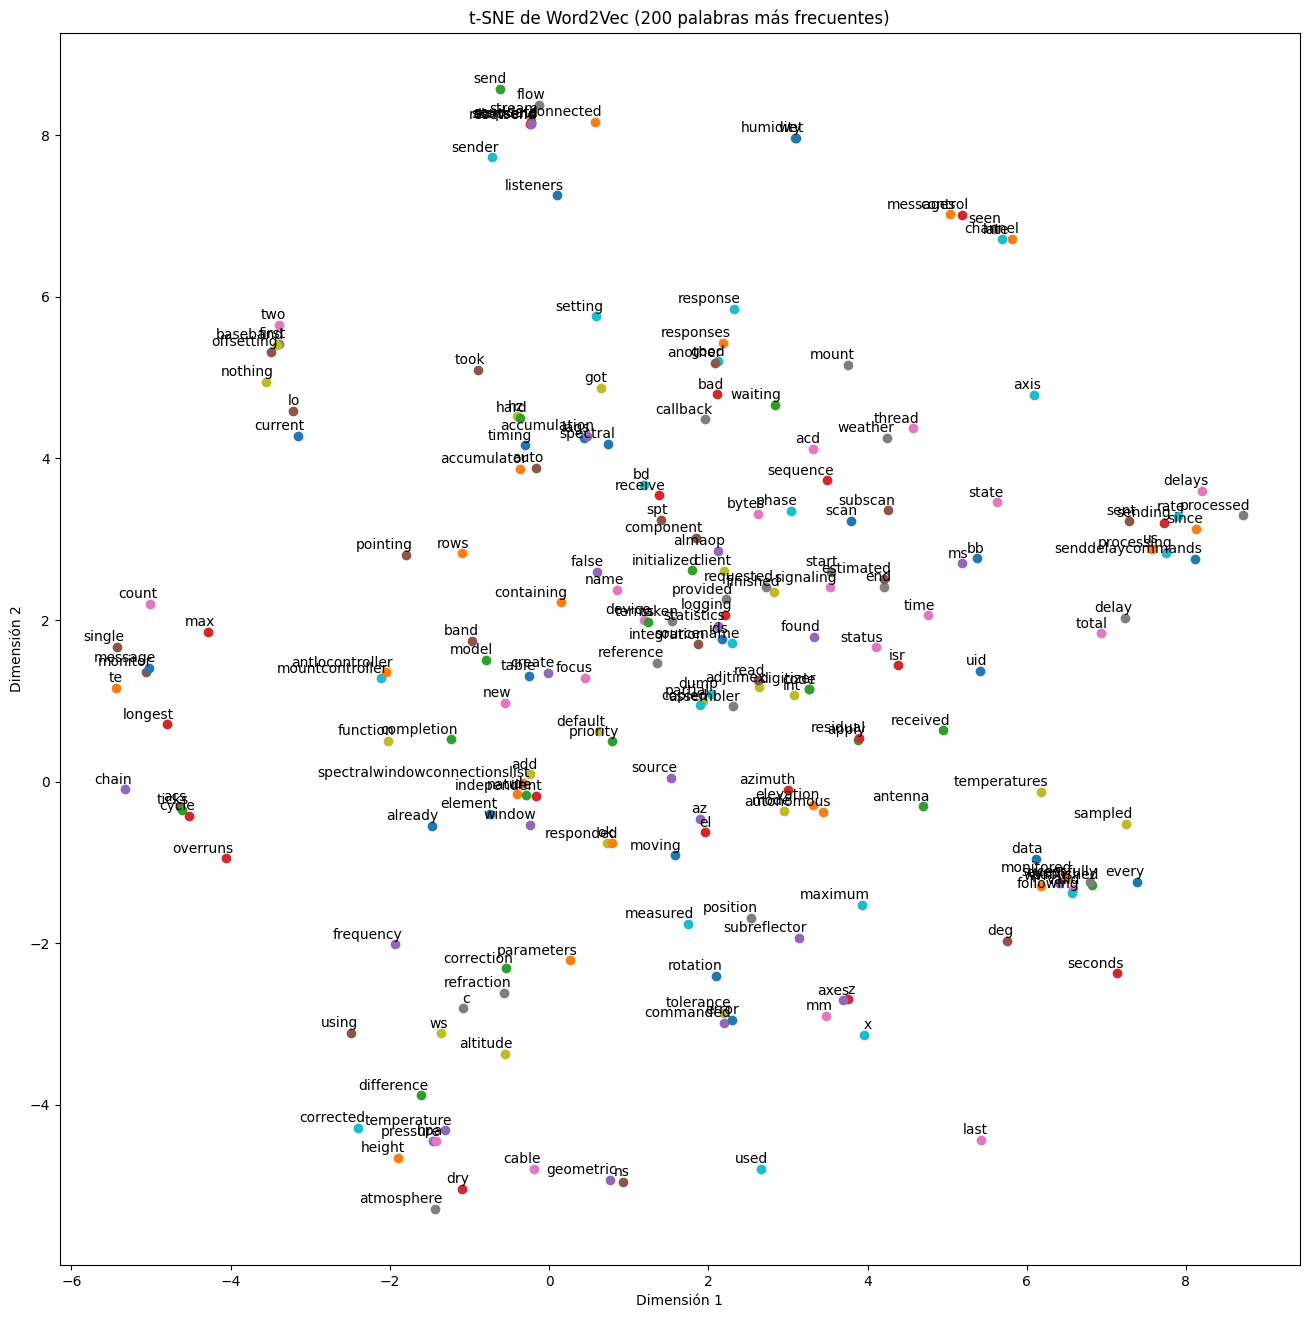

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Función para limpiar el texto
def limpiar_texto(texto):
    # Tokenizar el texto
    palabras = word_tokenize(texto)
    # Convertir a minúsculas
    palabras = [palabra.lower() for palabra in palabras]
    # Eliminar stopwords y palabras no alfabéticas
    palabras_limpias = [palabra for palabra in palabras if palabra.isalpha() and palabra not in stopwords.words('english')]
    return palabras_limpias

# Aplicar la limpieza de texto a la columna CDATA
df['PalabrasLimpias'] = df['CDATA'].apply(limpiar_texto)

# Preparar datos para Word2Vec
oraciones = df['PalabrasLimpias'].tolist()

# Entrenar el modelo Word2Vec
modelo_w2v = Word2Vec(oraciones, vector_size=100, window=5, min_count=1, workers=4)
vocabulario_w2v = list(modelo_w2v.wv.index_to_key)

# Vectorizar utilizando Word2Vec
vector_w2v = np.array([modelo_w2v.wv[palabra] for palabra in vocabulario_w2v])

# Seleccionar las 200 palabras más frecuentes para Word2Vec
palabras_frecuentes_w2v = [palabra for palabra, _ in Counter(vocabulario_w2v).most_common(200)]
vector_w2v_frecuente = np.array([modelo_w2v.wv[palabra] for palabra in palabras_frecuentes_w2v])

# Función para graficar t-SNE
def tsne_plot(vectors, labels, title):
    tsne_model = TSNE(perplexity=45, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(vectors)
    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title(title)
    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.show()

# Graficar t-SNE para las palabras más frecuentes en Word2Vec
tsne_plot(vector_w2v_frecuente, palabras_frecuentes_w2v, 't-SNE de Word2Vec (200 palabras más frecuentes)')

In [ ]:
# Filtrar solo las filas que sean del tipo 'Info'
df_info = df[df['Tipo'] == 'Info']

# Filtrar las filas que contengan la palabra 'CONTROL' en la columna 'Process'
df_control = df_info[df_info['Process'].str.contains('CONTROL', case=False, na=False)]

# Mostrar las primeras filas del DataFrame filtrado
df_control.head(10)

,Tipo,TimeStamp,File,Line,Routine,Host,Process,SourceObject,Thread,LogId,CDATA
0,Info,2023-09-08T16:13:06.461,ambServer.c,1150,loggingThread,lo-lmc-2,CONTROL/LMC2/cppContainer,ambServer,,,Channel 5 has seen 0 total control messages an...
1,Info,2023-09-08T16:13:06.528,ambServer.c,1131,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,ISR: 362210257/573113038991755 Unexp Int: 9132...
2,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 1 has seen 0 total control messages an...
5,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 2 has seen 0 total control messages an...
8,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 3 has seen 0 total control messages an...
9,Info,2023-09-08T16:13:06.528,ambServer.c,1142,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,Chan 0 has seen 2 late control messages out of...
12,Info,2023-09-08T16:13:06.484,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 4 has seen 0 total control messages an...
13,Info,2023-09-08T16:13:06.529,ambServer.c,1142,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,Chan 1 has seen 1 late control messages out of...
17,Info,2023-09-08T16:13:06.547,ambServer.c,1150,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,,,Channel 5 has seen 0 total control messages an...
18,Info,2023-09-08T16:13:06.529,ambServer.c,1150,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,,,Channel 2 has seen 1252 total control messages...


In [ ]:
# Contar el número de filas en el DataFrame filtrado
numero_filas = len(df_control)

# Mostrar el número de filas
print(numero_filas)

9985


In [ ]:
# Guardar el DataFrame filtrado en un archivo CSV
df_control.to_csv('filtered_data.csv', index=False)

# Descargar el archivo CSV a tu computadora
from google.colab import files
files.download('filtered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **CLUSTERING DE LOS LOGS CON K-MEANS**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving filtered_data_with_sentiment.csv to filtered_data_with_sentiment.csv


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_csv('filtered_data.csv')

# Mostrar las primeras filas para entender la estructura
data.head()

,Tipo,TimeStamp,File,Line,Routine,Host,Process,SourceObject,Thread,LogId,CDATA
0,Info,2023-09-08T16:13:06.461,ambServer.c,1150.0,loggingThread,lo-lmc-2,CONTROL/LMC2/cppContainer,ambServer,NaN,NaN,Channel 5 has seen 0 total control messages an...
1,Info,2023-09-08T16:13:06.528,ambServer.c,1131.0,loggingThread,dv06-abm,CONTROL/DV06/cppContainer,ambServer,NaN,NaN,ISR: 362210257/573113038991755 Unexp Int: 9132...
2,Info,2023-09-08T16:13:06.484,ambServer.c,1150.0,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,NaN,NaN,Channel 1 has seen 0 total control messages an...
3,Info,2023-09-08T16:13:06.484,ambServer.c,1150.0,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,NaN,NaN,Channel 2 has seen 0 total control messages an...
4,Info,2023-09-08T16:13:06.484,ambServer.c,1150.0,loggingThread,cob-dmc-03,CONTROL/DMC3/cppContainer,ambServer,NaN,NaN,Channel 3 has seen 0 total control messages an...


In [ ]:
# Extraer la columna CDATA
text_data = data['CDATA'].astype(str)

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data)

print(X.shape)  # Verificar las dimensiones del conjunto de datos transformado

(9985, 1000)


In [ ]:
# Definir el número de clusters
num_clusters = 5  # Esto puede ajustarse según los resultados esperados

# Crear el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar los clusters a los datos originales
data['Cluster'] = kmeans.labels_

# Mostrar el número de logs en cada cluster
print(data['Cluster'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
1    6300
0    1459
2    1049
4     620
3     557
Name: count, dtype: int64


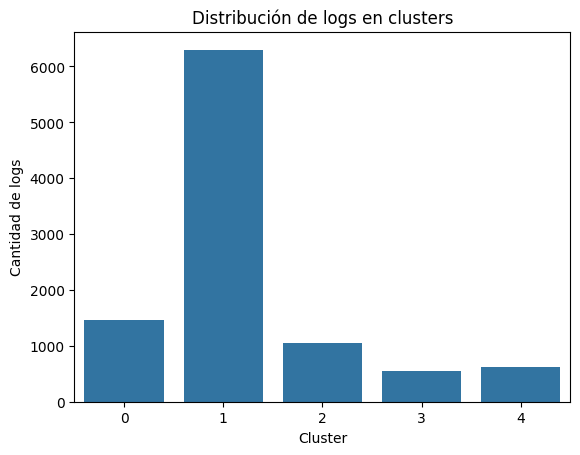


Cluster 0:
13     status: 0x18 control: 0x0A  Max ISR Time cpuf...
21     status: 0x18 control: 0x0A  Max ISR Time cpuf...
29    BulkDataCache::flowStop for TotalPowerStream6#...
30    BulkDataCache::flowStop for InterferometricStr...
31    BulkDataCache::flowStop for InterferometricStr...
Name: CDATA, dtype: object

Cluster 1:
0    Channel 5 has seen 0 total control messages an...
2    Channel 1 has seen 0 total control messages an...
3    Channel 2 has seen 0 total control messages an...
4    Channel 3 has seen 0 total control messages an...
5    Chan 0 has seen 2 late control messages out of...
Name: CDATA, dtype: object

Cluster 2:
1     ISR: 362210257/573113038991755 Unexp Int: 9132...
14    ISR: 306438479/574597853315547 Unexp Int: 7364...
22    ISR: 303127211/574627739114152 Unexp Int: 8781...
34    ISR: 377774166/574586257690143 Unexp Int: 1112...
43    ISR: 344704697/574596640881467 Unexp Int: 8072...
Name: CDATA, dtype: object

Cluster 3:
41     sendData will send data to 3 

In [ ]:
# Visualización de los clusters
sns.countplot(x='Cluster', data=data)
plt.title('Distribución de logs en clusters')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de logs')
plt.show()

# Mostrar algunas muestras de logs en cada cluster
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    print(data[data['Cluster'] == cluster_num]['CDATA'].head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


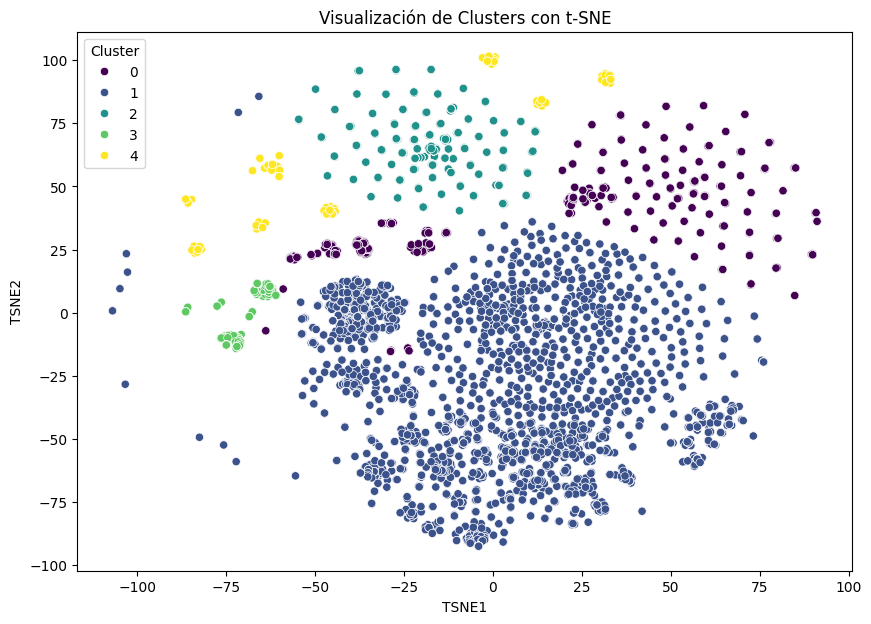


Cluster 0 (Logs relacionados con estados y operaciones de control):
13     status: 0x18 control: 0x0A  Max ISR Time cpuf...
21     status: 0x18 control: 0x0A  Max ISR Time cpuf...
29    BulkDataCache::flowStop for TotalPowerStream6#...
30    BulkDataCache::flowStop for InterferometricStr...
31    BulkDataCache::flowStop for InterferometricStr...
Name: CDATA, dtype: object 


Cluster 1 (Logs sobre mensajes de control de canales):
0    Channel 5 has seen 0 total control messages an...
2    Channel 1 has seen 0 total control messages an...
3    Channel 2 has seen 0 total control messages an...
4    Channel 3 has seen 0 total control messages an...
5    Chan 0 has seen 2 late control messages out of...
Name: CDATA, dtype: object 


Cluster 2 (Logs sobre interrupciones inesperadas (ISR)):
1     ISR: 362210257/573113038991755 Unexp Int: 9132...
14    ISR: 306438479/574597853315547 Unexp Int: 7364...
22    ISR: 303127211/574627739114152 Unexp Int: 8781...
34    ISR: 377774166/574586257690143

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
data = pd.read_csv('filtered_data.csv')

# Extraer la columna CDATA
text_data = data['CDATA'].astype(str)

# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data)

# Definir el número de clusters
num_clusters = 5

# Crear el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar los clusters a los datos originales
data['Cluster'] = kmeans.labels_

# Reducir dimensiones con t-SNE, inicialización en "random"
tsne = TSNE(n_components=2, random_state=42, init='random')
X_tsne = tsne.fit_transform(X)

# Crear un DataFrame con las coordenadas t-SNE y los clusters
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Cluster'] = data['Cluster']

# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis')
plt.title('Visualización de Clusters con t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')
plt.show()

# Interpretación de clusters
cluster_descriptions = {
    0: "Logs relacionados con estados y operaciones de control",
    1: "Logs sobre mensajes de control de canales",
    2: "Logs sobre interrupciones inesperadas (ISR)",
    3: "Logs sobre envío de datos",
    4: "Logs de errores en el manejo de eventos"
}

for cluster_num, description in cluster_descriptions.items():
    print(f"\nCluster {cluster_num} ({description}):")
    print(data[data['Cluster'] == cluster_num]['CDATA'].head(), "\n")


### **CREACIÓN DE LEXICON DE SENTIMIENTOS**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ALMA_Logs_Classified.csv to ALMA_Logs_Classified.csv


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('ALMA_Logs_Classified.csv')

In [7]:
filtered_data = data[['CDATA', 'Classification']]
filtered_data.head(10)

,CDATA,Classification
0,Channel 5 has seen 0 total control messages an...,1
1,ISR: 362210257/573113038991755 Unexp Int: 9132...,-1
2,Channel 1 has seen 0 total control messages an...,1
3,Channel 2 has seen 0 total control messages an...,1
4,Channel 3 has seen 0 total control messages an...,1
5,Chan 0 has seen 2 late control messages out of...,1
6,Channel 4 has seen 0 total control messages an...,1
7,Chan 1 has seen 1 late control messages out of...,1
8,Channel 5 has seen 0 total control messages an...,1
9,Channel 2 has seen 1252 total control messages...,1


In [9]:
# Contar la cantidad de etiquetas 1 y -1
sentiment_counts = filtered_data['Classification'].value_counts()

# Mostrar los resultados
print("Conteo de etiquetas de sentimiento:")
print(sentiment_counts)

Conteo de etiquetas de sentimiento:
Classification
 1    8936
-1    1049
Name: count, dtype: int64


Clases en los datos de entrenamiento: [-1  1]
Accuracy: 1.00
          Feature    Weight
104       monitor  2.130100
170          time  1.951243
98            max  1.913291
169         ticks  1.887947
37        control  1.791745
102        method  1.753299
69         forgot  1.753299
124  processevent  1.753299
119      override  1.753299
155        status  1.581222
      Feature    Weight
168    thread  0.000000
59    failure  0.000000
85        isr -0.574152
20     busoff -2.266393
80        int -2.266393
181     unexp -2.266393
108    msglst -2.266393
185     write -2.266393
171  timeouts -2.266393
126      read -2.266393


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-8-4f87b4614d80>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Weight', data=sentiment_lexicon.head(60), palette='coolwarm')


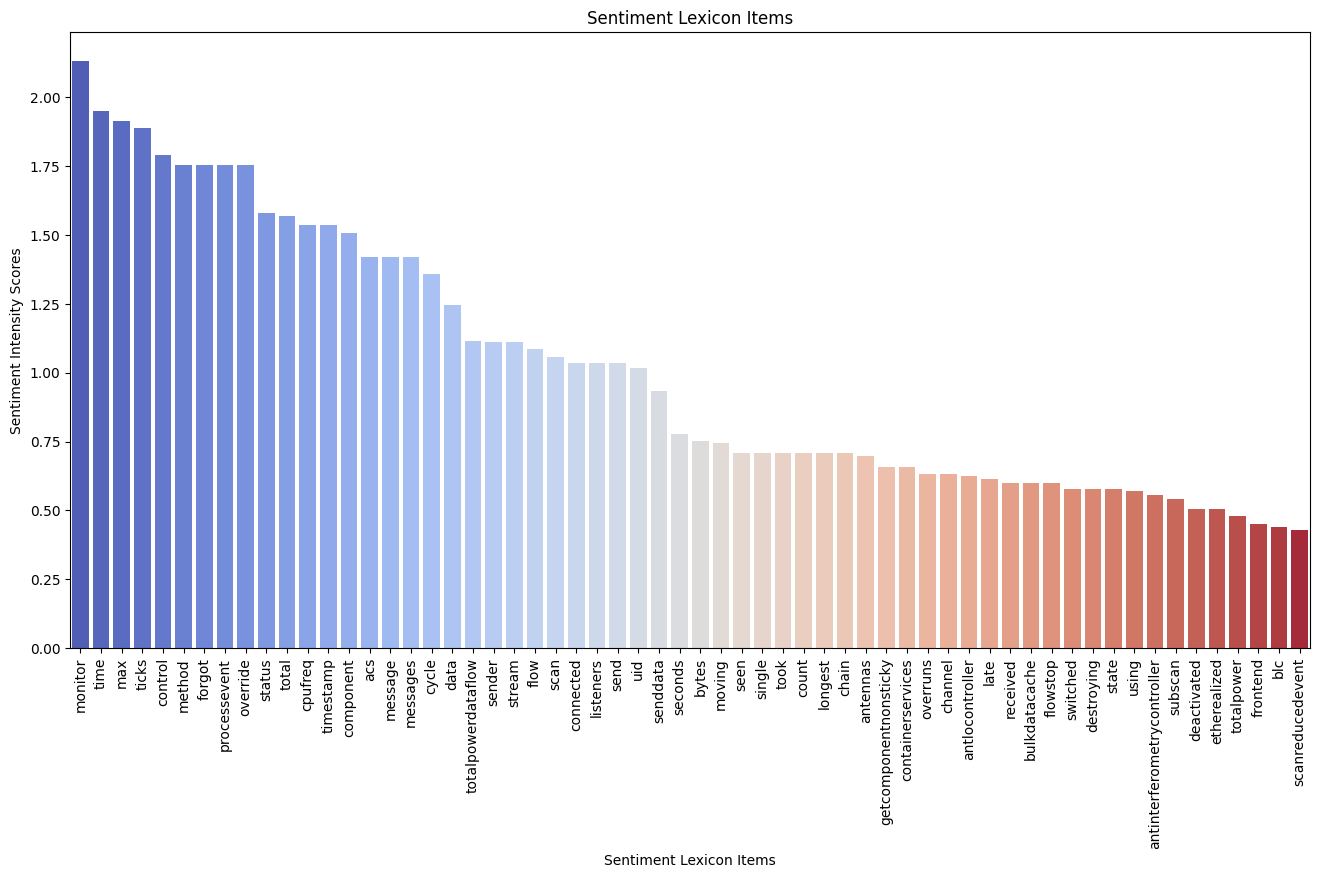

In [8]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir todos los valores de CDATA a string
data['CDATA'] = data['CDATA'].astype(str).fillna('')

# Tokenización y conversión a TF-IDF, asegurando que solo se incluyan palabras
vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{3,}\b')
X = vectorizer.fit_transform(data['CDATA'])
y = data['Classification']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las clases en los datos de entrenamiento
print("Clases en los datos de entrenamiento:", np.unique(y_train))

# Calcular pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i : class_weights[i] for i in np.unique(y_train)}

# Entrenar el modelo de regresión logística con SGD con pesos de clase
sgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42, class_weight=class_weight_dict)
sgd.fit(X_train, y_train)

# Evaluar el modelo
accuracy = sgd.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Extraer características y sus pesos
feature_names = vectorizer.get_feature_names_out()
weights = sgd.coef_[0]

# Construir el léxico de sentimientos
sentiment_lexicon = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
})

# Ordenar el léxico por los pesos (scores)
sentiment_lexicon = sentiment_lexicon.sort_values(by='Weight', ascending=False)

# Guardar el léxico en un archivo CSV
lexicon_path = 'sentiment_lexicon_with_class_weights.csv'
sentiment_lexicon.to_csv(lexicon_path, index=False)

# Mostrar las primeras filas del léxico
print(sentiment_lexicon.head(10))
print(sentiment_lexicon.tail(10))

# Visualización del léxico de sentimientos mostrando más palabras
plt.figure(figsize=(16, 8))
sns.barplot(x='Feature', y='Weight', data=sentiment_lexicon.head(60), palette='coolwarm')
plt.title('Sentiment Lexicon Items')
plt.xlabel('Sentiment Lexicon Items')
plt.ylabel('Sentiment Intensity Scores')
plt.xticks(rotation=90)
plt.show()

Clases en los datos de entrenamiento: [-1  1]
Accuracy: 1.00
          Feature    Weight
104       monitor  2.130100
170          time  1.951243
98            max  1.913291
169         ticks  1.887947
37        control  1.791745
102        method  1.753299
69         forgot  1.753299
124  processevent  1.753299
119      override  1.753299
155        status  1.581222
      Feature    Weight
168    thread  0.000000
59    failure  0.000000
85        isr -0.574152
20     busoff -2.266393
80        int -2.266393
181     unexp -2.266393
108    msglst -2.266393
185     write -2.266393
171  timeouts -2.266393
126      read -2.266393


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
<ipython-input-18-d88fc5e6d0cd>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Weight', data=sentiment_lexicon.head(30), palette='coolwarm')
<ipython-input-18-d88fc5e6d0cd>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Weight', data=sentiment_lexicon.tail(30), palette='coolwarm')


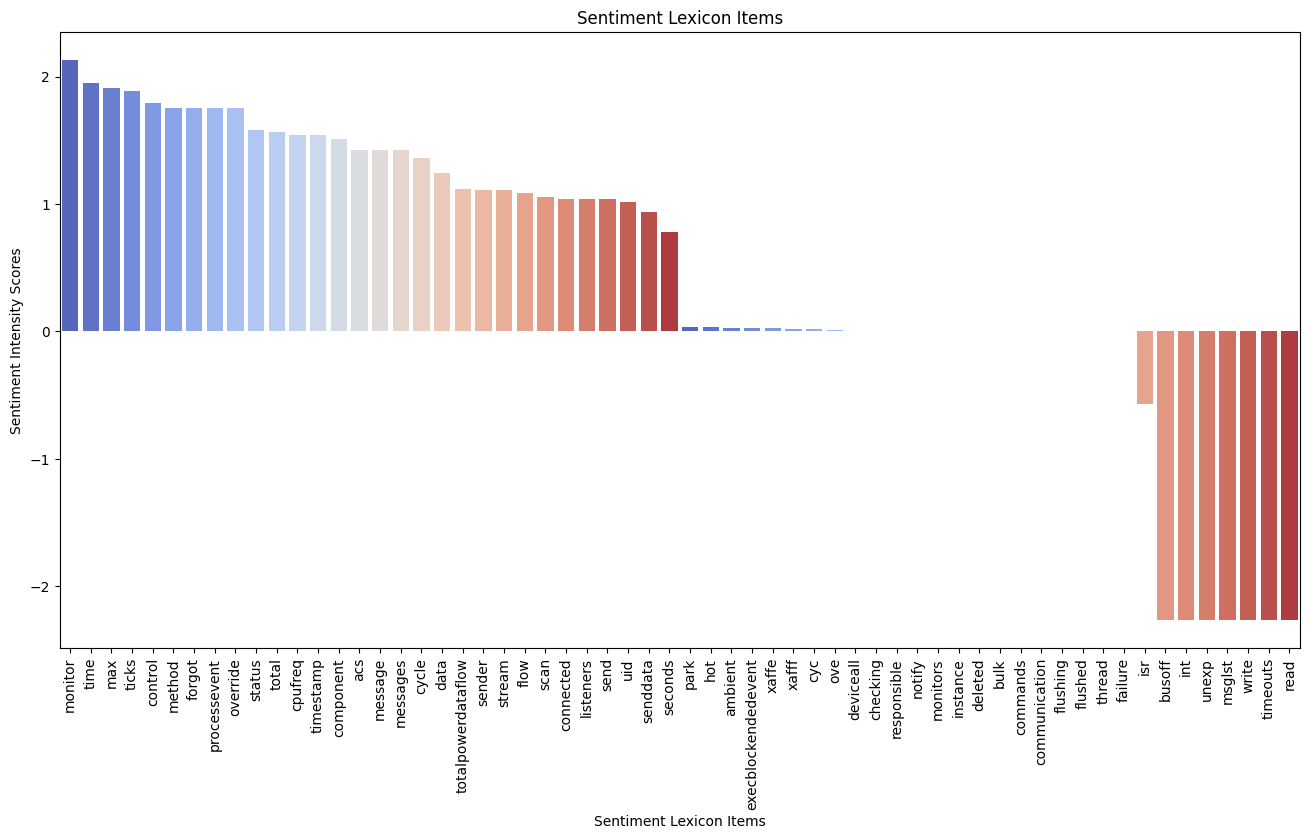

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos (asegúrate de cargar los datos en el DataFrame 'data')
file_path = 'ALMA_Logs_Classified.csv'
data = pd.read_csv(file_path)

# Convertir todos los valores de CDATA a string
data['CDATA'] = data['CDATA'].astype(str).fillna('')

# Tokenización y conversión a TF-IDF, asegurando que solo se incluyan palabras
vectorizer = TfidfVectorizer(stop_words='english', token_pattern=r'\b[a-zA-Z]{3,}\b')
X = vectorizer.fit_transform(data['CDATA'])
y = data['Classification']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las clases en los datos de entrenamiento
print("Clases en los datos de entrenamiento:", np.unique(y_train))

# Calcular pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i : class_weights[i] for i in np.unique(y_train)}

# Entrenar el modelo de regresión logística con SGD con pesos de clase
sgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42, class_weight=class_weight_dict)
sgd.fit(X_train, y_train)

# Evaluar el modelo
accuracy = sgd.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

# Extraer características y sus pesos
feature_names = vectorizer.get_feature_names_out()
weights = sgd.coef_[0]

# Construir el léxico de sentimientos con scores sin normalizar
sentiment_lexicon = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights
})

# Ordenar el léxico por los pesos (scores)
sentiment_lexicon = sentiment_lexicon.sort_values(by='Weight', ascending=False)

# Guardar el léxico en un archivo CSV
lexicon_path = 'sentiment_lexicon_without_normalization.csv'
sentiment_lexicon.to_csv(lexicon_path, index=False)

# Mostrar las primeras filas del léxico
print(sentiment_lexicon.head(10))
print(sentiment_lexicon.tail(10))

# Visualización del léxico de sentimientos mostrando más palabras
plt.figure(figsize=(16, 8))
sns.barplot(x='Feature', y='Weight', data=sentiment_lexicon.head(30), palette='coolwarm')
sns.barplot(x='Feature', y='Weight', data=sentiment_lexicon.tail(30), palette='coolwarm')
plt.title('Sentiment Lexicon Items')
plt.xlabel('Sentiment Lexicon Items')
plt.ylabel('Sentiment Intensity Scores')
plt.xticks(rotation=90)
plt.show()